In [1]:
# Importing necessary libraries
import pandas as pd       # For data handling (loading, cleaning, analysis)
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For advanced visualizations
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.linear_model import LinearRegression      # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load dataset from CSV file
data = pd.read_csv("housing.csv")

# Encode categorical variables into numeric
data = pd.get_dummies(data, drop_first=False)

# Now check again
print(data.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2        False   
1  12250000  8960         4          4        4        3        False   
2  12250000  9960         3          2        2        2        False   
3  12215000  7500         4          2        2        3        False   
4  11410000  7420         4          1        2        2        False   

   mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0          True          True          False  ...         False   
1          True          True          False  ...         False   
2          True          True          False  ...          True   
3          True          True          False  ...          True   
4          True         False           True  ...          True   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                True                False               False   
1                True     

In [3]:
# Shape of dataset (rows, columns)
print("Dataset shape:", data.shape)

# Summary of dataset
print("\nDataset Info:")
print(data.info())

Dataset shape: (545, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    bool 
 7   mainroad_yes                     545 non-null    bool 
 8   guestroom_no                     545 non-null    bool 
 9   guestroom_yes                    545 non-null    bool 
 10  basement_no                      545 non-null    bool 
 11  basement_yes                     545 non-null    bool 
 12  hotwaterhe

In [4]:
# Assuming 'price' is the column we want to predict
X = data.drop("price", axis=1)  # Features (all except target)
y = data["price"]               # Target variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (545, 20)
Target shape: (545,)


In [5]:
# Splitting dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (436, 20) (436,)
Testing data shape: (109, 20) (109,)


In [6]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

print(" Model training completed!")

 Model training completed!


In [7]:
# Predict house prices on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Define custom accuracy (within 10% of actual price)
tolerance = 0.10  # 10%
accurate_preds = np.abs((y_pred - y_test) / y_test) <= tolerance
custom_accuracy = np.mean(accurate_preds)

print("Custom Accuracy (within 10% tolerance):", custom_accuracy)

Mean Squared Error (MSE): 1754318687330.6614
R^2 Score: 0.6529242642153188
Custom Accuracy (within 10% tolerance): 0.3486238532110092


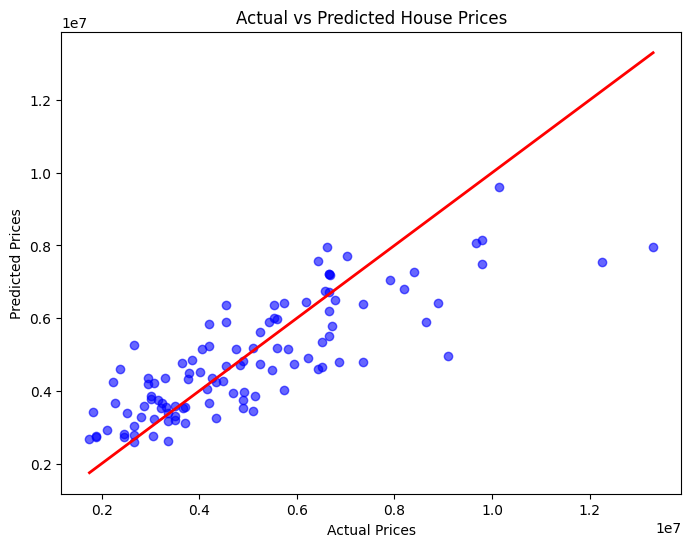

In [8]:
# Plot perfect prediction line (y = x)
plt.figure(figsize=(8,6))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2)

plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

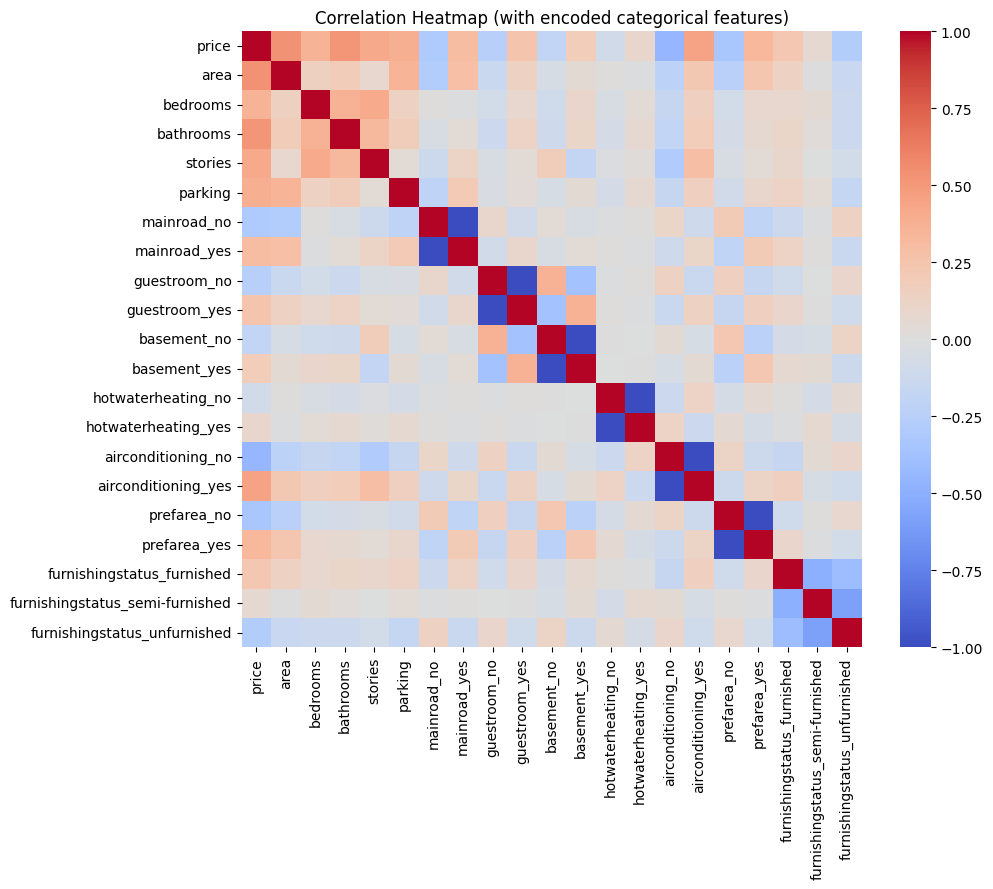

In [9]:
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

plt.figure(figsize=(10,8))
sns.heatmap(data_encoded.corr(), annot=False, cmap="coolwarm") #red= direct relation, blue= inverse relation
plt.title("Correlation Heatmap (with encoded categorical features)")
plt.show()

In [10]:
# Create a new house in the same raw format as your CSV
new_house_raw = pd.DataFrame({
    "area": [8500],
    "bedrooms": [4],
    "bathrooms": [3],
    "stories": [2],
    "mainroad": ["yes"],
    "guestroom": ["no"],
    "basement": ["yes"],
    "hotwaterheating": ["no"],
    "airconditioning": ["yes"],
    "parking": [2],
    "prefarea": ["yes"],
    "furnishingstatus": ["furnished"]
})

# Apply the same one-hot encoding
new_house_encoded = pd.get_dummies(new_house_raw)

# Align columns with training data (missing ones will be filled with 0)
new_house_encoded = new_house_encoded.reindex(columns=X.columns, fill_value=0)

# Predict
predicted_price = model.predict(new_house_encoded)
print("Predicted Price for new house:", predicted_price[0])

Predicted Price for new house: 9300341.802588869
